Лосев Владислав, ФН12-31м. tweeter sentiment analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import torch

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:

   # C:\Users\Acer\Documents\ФН12_2год\nlp
data=pd.read_csv(r'C:\Users\user\Documents\FN12_2sem\twitter_training.csv')

In [5]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
def data_info(data):
    print('Первые 5 строк в датафрейме:')
    display(data.head())
    print('------------------------------------------------------------------------------------')
    print('Основная информация df.info():')
    data.info()
    print('------------------------------------------------------------------------------------')
    display(pd.DataFrame({'Количество пропущенных значений': data.isna().sum()}))
    print('------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print('------------------------------------------------------------------------------------')
    

In [7]:
data_info(data)

Первые 5 строк в датафрейме:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


------------------------------------------------------------------------------------
Основная информация df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
------------------------------------------------------------------------------------


,Количество пропущенных значений
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


------------------------------------------------------------------------------------
Количество дубликатов: 2700
------------------------------------------------------------------------------------


In [8]:
data.columns=['id','games/apps','sentiment_type','text']

In [9]:
data

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


В данном случае нет возможности заменить пропуски в столбце текст, поэтому удалим их (тем более их не много).

In [10]:
data=data.dropna()

In [11]:
data=data.drop_duplicates()

In [12]:
data_info(data)

Первые 5 строк в датафрейме:


,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


------------------------------------------------------------------------------------
Основная информация df.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              71655 non-null  int64 
 1   games/apps      71655 non-null  object
 2   sentiment_type  71655 non-null  object
 3   text            71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB
------------------------------------------------------------------------------------


,Количество пропущенных значений
id,0
games/apps,0
sentiment_type,0
text,0


------------------------------------------------------------------------------------
Количество дубликатов: 0
------------------------------------------------------------------------------------


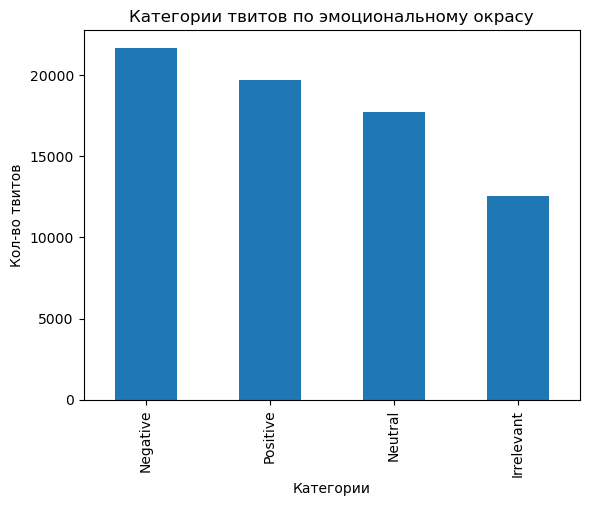

In [13]:
data['sentiment_type'].value_counts().plot(kind='bar');
plt.title('Категории твитов по эмоциональному окрасу');
plt.xlabel('Категории');
plt.ylabel('Кол-во твитов');

Дисбаланса классов не наблюдается. Можно использовать метрику accuracy

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [15]:
pd.set_option('display.max_colwidth', 100)
data.head(30)

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
5,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands ...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Bord...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan...
8,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE Rhandler...


In [16]:
data['text'] = data['text'].str.lower()

Загрузим и добавим стоп-слова

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
print(stop_words)

{'once', 'the', 've', 'off', 'too', 'this', 'other', 'she', "you'll", 'when', "you're", 'against', 'my', 'doing', 'where', 'before', 'shouldn', 'do', "you've", 'and', 'very', 'than', 'because', 'who', 'now', 'its', 'what', "isn't", "doesn't", 'shan', 's', 'yours', "weren't", "you'd", "couldn't", 'doesn', "needn't", 'were', 'during', 'below', 'mustn', 'being', 'not', 'wasn', 'yourselves', 'be', "didn't", 'down', 'nor', 'will', 'don', 'they', 'i', 'are', "shouldn't", 'few', 'how', 'if', "should've", 'ma', 'weren', 'themselves', 'll', 'as', 'under', 'up', 'theirs', 'with', 'he', "won't", 'at', 'which', 'on', 'further', 'only', "mustn't", 'it', 'for', 'was', 'her', "wouldn't", 'those', "hasn't", 'them', 'm', "shan't", 'there', 'can', 'a', 'an', 'own', 'himself', 'y', 'does', 'to', 'mightn', 'you', "mightn't", 'by', 'ourselves', 'again', 'itself', 'hadn', 'all', "aren't", 'each', 'so', 'that', 'hers', 'him', 'until', 'whom', "haven't", 'same', 'more', "wasn't", "it's", 'ain', 'did', 'just',

Среди стоп слов есть слова по типу don't, no и т.д. которые очень важны для оценки эмоционального окраса отзывов. 
Например, i don't like this game до удаления стоп-слов и like game приведет к совершенно другому смыслу. 
Поэтому уберем из списка стоп-слов с явным положительным/отрицательным окрасом

In [19]:
stop_words=stop_words-{'should',"mustn't",'won','didn',"won't","shouldn't",'not',"don't","doesn't", 'did', "didn't", "isn't",
                    'has', 'hasn', "couldn't" , "aren't", "needn't", "wasn't", 'shouldn'  }

In [20]:
print(stop_words)


{'once', 'the', 've', 'off', 'too', 'this', 'other', 'she', "you'll", 'when', "you're", 'against', 'my', 'doing', 'where', 'before', 'do', "you've", 'and', 'very', 'than', 'because', 'who', 'now', 'its', 'what', 'shan', 's', 'yours', "weren't", "you'd", 'doesn', 'were', 'during', 'below', 'mustn', 'being', 'wasn', 'yourselves', 'be', 'down', 'nor', 'will', 'don', 'they', 'i', 'are', 'few', 'how', 'if', "should've", 'ma', 'weren', 'themselves', 'll', 'as', 'under', 'up', 'theirs', 'with', 'he', 'at', 'which', 'on', 'further', 'only', 'it', 'for', 'was', 'her', "wouldn't", 'those', "hasn't", 'them', 'm', "shan't", 'there', 'can', 'a', 'an', 'own', 'himself', 'y', 'does', 'to', 'mightn', 'you', "mightn't", 'by', 'ourselves', 'again', 'itself', 'hadn', 'all', 'each', 'so', 'that', 'hers', 'him', 'until', 'whom', "haven't", 'same', 'more', "it's", 'ain', 'just', 'after', 'while', 'your', 'is', 'd', 'yourself', 'both', 'aren', 'ours', 'me', 'having', 'am', 'been', 'then', 'no', 'wouldn', 'ab

Удалим стоп-слова и знаки препинания 

In [21]:
def remove_stopwords(text):
    
    words = word_tokenize(text.lower())

    filtered_words = [
        word for word in words 
        if word not in stop_words and word not in string.punctuation
    ]
  
    return ' '.join(filtered_words)

In [22]:
data['text'] = data['text'].apply(remove_stopwords)

In [23]:
pd.set_option('display.max_colwidth', 100)
data.head(20)

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder
5,2402,Borderlands,Positive,spent hours making something fun n't know huge borderlands fan maya one favorite characters deci...
6,2402,Borderlands,Positive,spent couple hours something fun ... n't know 'm huge borderlands fan maya one favorite characte...
7,2402,Borderlands,Positive,spent hours something fun ... n't know 'm huge borderlands fan maya one favorite characters
8,2402,Borderlands,Positive,spent hours making something fun n't know huge rhandlerr fan maya one favorite characters decide...
9,2402,Borderlands,Positive,2010 spent hours making something fun n't know huge rhandlerr fan maya one favorite characters d...


Произведем лемматизацию, в том числе для сокращения размерности векторов

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Лемматизируем слов

In [25]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens
    ]
    return ' '.join(lemmatized_tokens)



In [26]:
#пока еще не лемматизированные данные
data_nolem=data

In [27]:
data_nolem.head()

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder


In [28]:

data['text'] = data['text'].apply(lemmatize_sentence)

In [29]:
data.head(10)

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland 2 murder
4,2401,Borderlands,Positive,im get borderland murder
5,2402,Borderlands,Positive,spent hour make something fun n't know huge borderland fan maya one favorite character decide ma...
6,2402,Borderlands,Positive,spent couple hour something fun ... n't know 'm huge borderland fan maya one favorite character ...
7,2402,Borderlands,Positive,spent hour something fun ... n't know 'm huge borderland fan maya one favorite character
8,2402,Borderlands,Positive,spent hour make something fun n't know huge rhandlerr fan maya one favorite character decide mak...
9,2402,Borderlands,Positive,2010 spent hour make something fun n't know huge rhandlerr fan maya one favorite character decid...


Создание tf-idf представления слов. Удалим наиболее редко встречающиеся слова с помощью min_df

In [30]:
tfidf = TfidfVectorizer(
    
    min_df=0.0001,max_df=0.9
)

X_train_tfidf = tfidf.fit_transform(data['text'])

In [31]:
tfidf.get_feature_names_out()

array(['00', '000', '00016', ..., 'zpr', 'zsmitty', 'zuckerberg'],
      dtype=object)

In [32]:
tfidf_array = X_train_tfidf.toarray()

In [33]:
tfidf_array.shape

(71655, 7309)

Слова с наибольшей суммой весов

In [34]:

df_tfidf = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())


total_tfidf = df_tfidf.sum()


sorted_tfidf = total_tfidf.sort_values(ascending=False)


top_n = 20
print(f"Топ-{top_n} слов с наибольшим весом в TF-IDF среди всех документов:")
print(sorted_tfidf.head(top_n))

Топ-20 слов с наибольшим весом в TF-IDF среди всех документов:
game       1537.012846
com        1369.448627
get        1217.567282
not        1019.989846
play        997.235510
fuck        995.744038
like        895.071568
go          884.306218
love        860.306303
unk         854.860044
pic         791.443253
good        787.453338
twitter     757.444584
make        698.827774
one         694.857616
shit        687.805327
see         667.450102
time        664.669655
have        653.955544
look        648.357419
dtype: float64


Данные слова часто встречаются и скорее всего важны для классификации

In [35]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
from sklearn.metrics import  ConfusionMatrixDisplay

In [37]:
data.head()

,id,games/apps,sentiment_type,text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland 2 murder
4,2401,Borderlands,Positive,im get borderland murder


In [38]:
from sklearn.preprocessing import LabelEncoder


labels = data['sentiment_type']


label_encoder = LabelEncoder()
data['sentiment_type']= label_encoder.fit_transform(labels)



In [39]:
print("Оригинальные категории:", label_encoder.classes_)
print('                            0           1            2            3')

Оригинальные категории: ['Irrelevant' 'Negative' 'Neutral' 'Positive']
                            0           1            2            3


In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [41]:
X=tfidf_array
y=data['sentiment_type']


In [42]:
X.shape

(71655, 7309)

In [43]:
y=np.array(y)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Сначала попробуем решить задачу классификации с использованием логистической регрессии без предварительной лемматизации

In [45]:

X_tfidf2 = tfidf.fit_transform(data_nolem['text'])
tfidf_array2 = X_tfidf2.toarray()
labels2 = data_nolem['sentiment_type']
label_encoder2 = LabelEncoder()
data['sentiment_type']= label_encoder2.fit_transform(labels2)
X2=tfidf_array2
y2=data_nolem['sentiment_type']
y2=np.array(y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                           max_iter=1000,n_jobs=-1)
model2.fit(X_train2, y_train2)


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1)

In [46]:
y_pred2=model2.predict(X_test2)

Значения основных метрик

In [47]:
print("\n=== Отчет по классификации ===")
print(classification_report(y_test2, y_pred2))


=== Отчет по классификации ===
              precision    recall  f1-score   support

           0       0.72      0.58      0.65      2455
           1       0.76      0.80      0.78      4433
           2       0.72      0.66      0.69      3532
           3       0.68      0.77      0.72      3911

    accuracy                           0.72     14331
   macro avg       0.72      0.71      0.71     14331
weighted avg       0.72      0.72      0.72     14331



In [48]:
f1_score(y_pred2, y_test2,average='micro')

0.7222803712232224

In [49]:
f1_score(y_pred2, y_test2,average='macro')

0.7105638883248464

Теперь при лемматизации

In [50]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                           max_iter=1000,n_jobs=-1)
model.fit(X_train, y_train)




LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1)

Логистическая регрессия с L2 регуляризацией

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns

X_train=np.nan_to_num(X_train, nan=0)
X_test=np.nan_to_num(X_test, nan=0)

clf = SGDClassifier(
    loss='log_loss',            
    penalty='l2',          
    alpha=0.00001,          
    max_iter=1,            
    learning_rate='optimal',
    tol=None,              
    warm_start=True,       
    random_state=42,
    verbose=0              
)

classes = np.unique(y_train)
alpha = clf.alpha
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
y_test_onehot=np.nan_to_num(y_test_onehot, nan=0)
y_train_onehot=np.nan_to_num(y_train_onehot, nan=0)
n_epochs = 200 #для примера можно оставить 100 эпох

l2_loss=[]

for epoch in range(1, n_epochs + 1):
    clf.partial_fit(X_train, y_train,classes=classes)

    prob = clf.predict_proba(X_test)
    prob=np.nan_to_num(prob, nan=0)

    loss = log_loss(y_test_onehot, prob)
    coef = clf.coef_
    l2_penalty = alpha * np.sum(coef ** 2)

    total_loss = loss + l2_penalty
    

    if epoch % 10 == 0 or epoch == 1:
        print(f"Эпоха {epoch}: Log Loss = {loss:.4f}, Total Loss = {total_loss:.4f}")
        l2_loss.append(total_loss)


y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

print("\n=== Отчет по классификации ===")
print(classification_report(y_test, y_pred))

Эпоха 1: Log Loss = 1.0829, Total Loss = 1.7066
Эпоха 10: Log Loss = 0.8310, Total Loss = 1.1983
Эпоха 20: Log Loss = 0.8005, Total Loss = 1.1574
Эпоха 30: Log Loss = 0.7899, Total Loss = 1.1433
Эпоха 40: Log Loss = 0.7847, Total Loss = 1.1365
Эпоха 50: Log Loss = 0.7817, Total Loss = 1.1324
Эпоха 60: Log Loss = 0.7798, Total Loss = 1.1297
Эпоха 70: Log Loss = 0.7784, Total Loss = 1.1278
Эпоха 80: Log Loss = 0.7773, Total Loss = 1.1264
Эпоха 90: Log Loss = 0.7766, Total Loss = 1.1254
Эпоха 100: Log Loss = 0.7760, Total Loss = 1.1246
Эпоха 110: Log Loss = 0.7755, Total Loss = 1.1239
Эпоха 120: Log Loss = 0.7752, Total Loss = 1.1234
Эпоха 130: Log Loss = 0.7749, Total Loss = 1.1230
Эпоха 140: Log Loss = 0.7747, Total Loss = 1.1226
Эпоха 150: Log Loss = 0.7745, Total Loss = 1.1224
Эпоха 160: Log Loss = 0.7744, Total Loss = 1.1221
Эпоха 170: Log Loss = 0.7742, Total Loss = 1.1219
Эпоха 180: Log Loss = 0.7741, Total Loss = 1.1218
Эпоха 190: Log Loss = 0.7741, Total Loss = 1.1216
Эпоха 200: 

Логистическая регрессия с L1 регуляризацией

In [52]:
clf1 =  SGDClassifier(
    loss='log_loss',            
    penalty='l1',         
    alpha=0.00001,         
    max_iter=1,           
    learning_rate='optimal',
    tol=None,              
    warm_start=True,       
    random_state=42
)
alpha = clf1.alpha
l1_loss=[]
for epoch in range(1, n_epochs + 1):
    clf1.partial_fit(X_train, y_train,classes=classes)

    prob = clf1.predict_proba(X_test)
    prob=np.nan_to_num(prob, nan=0)

    loss = log_loss(y_test_onehot, prob)
    coef = clf.coef_
    l1_penalty = alpha * np.sum(np.abs(coef))
    total_loss = loss + l1_penalty
    

    if epoch % 10 == 0 or epoch == 1:
        print(f"Эпоха {epoch}: Log Loss = {loss:.4f}, Total Loss = {total_loss:.4f}")
        l1_loss.append(total_loss)


y_pred = clf1.predict(X_test)

y_pred_proba = clf1.predict_proba(X_test)

print("\n=== Отчет по классификации ===")
print(classification_report(y_test, y_pred))

Эпоха 1: Log Loss = 1.2068, Total Loss = 1.4542
Эпоха 10: Log Loss = 0.7852, Total Loss = 1.0326
Эпоха 20: Log Loss = 0.7593, Total Loss = 1.0067
Эпоха 30: Log Loss = 0.7504, Total Loss = 0.9978
Эпоха 40: Log Loss = 0.7460, Total Loss = 0.9934
Эпоха 50: Log Loss = 0.7434, Total Loss = 0.9908
Эпоха 60: Log Loss = 0.7416, Total Loss = 0.9890
Эпоха 70: Log Loss = 0.7404, Total Loss = 0.9878
Эпоха 80: Log Loss = 0.7396, Total Loss = 0.9870
Эпоха 90: Log Loss = 0.7390, Total Loss = 0.9863
Эпоха 100: Log Loss = 0.7385, Total Loss = 0.9859
Эпоха 110: Log Loss = 0.7381, Total Loss = 0.9855
Эпоха 120: Log Loss = 0.7378, Total Loss = 0.9852
Эпоха 130: Log Loss = 0.7376, Total Loss = 0.9850
Эпоха 140: Log Loss = 0.7375, Total Loss = 0.9849
Эпоха 150: Log Loss = 0.7373, Total Loss = 0.9847
Эпоха 160: Log Loss = 0.7372, Total Loss = 0.9846
Эпоха 170: Log Loss = 0.7371, Total Loss = 0.9845
Эпоха 180: Log Loss = 0.7371, Total Loss = 0.9845
Эпоха 190: Log Loss = 0.7370, Total Loss = 0.9844
Эпоха 200: 

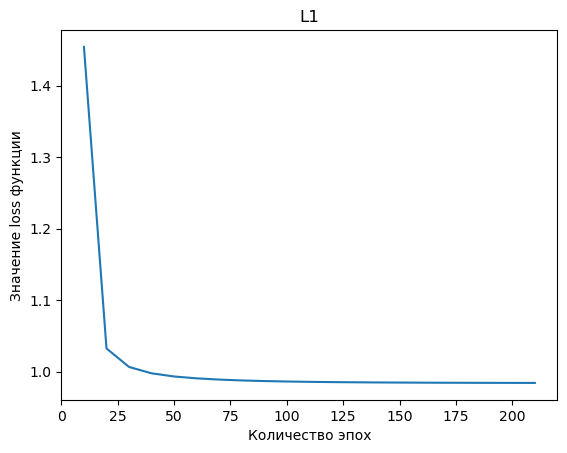

In [53]:
yy=[(i+1)*10 for i in range(int(n_epochs/10)+1)]
plt.plot(yy,l1_loss);
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('L1');

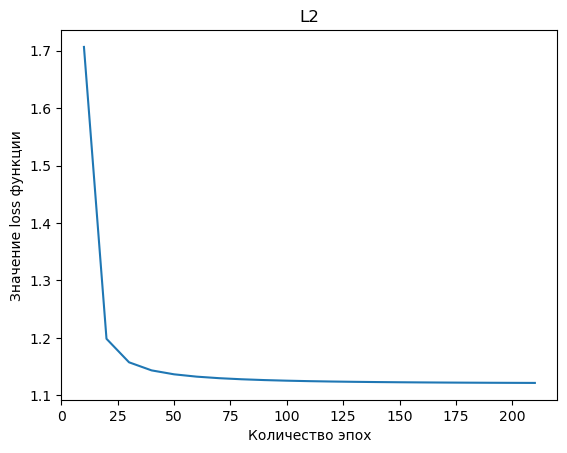

In [54]:
yy=[(i+1)*10 for i in range(int(n_epochs/10)+1)]
plt.plot(yy,l2_loss);
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('L2');

Таким образом, лемматизация не сильно влияет на качество модели. Но с лемматизацией модель работает быстрее, таким образом 
следует использовать вариант с лемматизацией

In [55]:
y_pred=model.predict(X_test)

In [56]:
print(f'Точность модели: {accuracy_score(y_pred, y_test):.2f}')


Точность модели: 0.72


In [57]:
f1_score(y_pred, y_test,average='macro')

0.7105638883248464

In [58]:
f1_score(y_pred, y_test,average='micro')

0.7222803712232224

In [59]:
accuracy = accuracy_score(model.predict(X_train), y_train)
print(f'Точность модели на train: {accuracy:.2f}')


Точность модели на train: 0.77


In [60]:
#weights=model.coef_
weights=clf1.coef_

In [61]:
weights.shape

(4, 7309)

Найдем слова, которые получили при L1 регуляризации наименьший вес (т.е. занулились)

In [62]:
zero_w1= [index for index, value in enumerate(weights[0]) if value == 0]
zero_w2= [index for index, value in enumerate(weights[1]) if value == 0]
zero_w3= [index for index, value in enumerate(weights[2]) if value == 0]
zero_w4= [index for index, value in enumerate(weights[3]) if value == 0]


In [63]:
all_words=tfidf.get_feature_names_out()


In [64]:
extracted_elements = set(set([all_words[index] for index in zero_w1])&set([all_words[index] for index in zero_w2])&set([all_words[index] for index in zero_w3])&set([all_words[index] for index in zero_w4]))

print(len(extracted_elements))

917


Это для L1. Слова, которые обнуляются. К таким словам относятся редкие слова, по типу:  'chromium', 'chunk','partisan' и т.д.
    А также различные числа и слова не имеющие особого смысла:'19th', '1min', '2005', '2008', '2011', 'ws', 'wtffff', 'x1', 'zoth', 'zpr', 'zsmitty' и т.д.

In [65]:
print(sorted(extracted_elements))


['00pm', '04', '101', '1050', '107', '123', '125', '144', '15th', '165', '1650', '16th', '170', '172', '17th', '183', '184', '188', '1982', '1994', '19th', '1min', '2005', '2008', '2011', '2012', '2015', '2060', '246', '24hrs', '2500', '256', '26', '29th', '2gb', '2k16', '2k_anz', '30min', '30th', '34', '3pm', '3v3', '40gb', '40up', '49', '4gb', '51', '512gb', '54', '587', '64gb', '65', '6th', '700k', '71', '81', '82', '8gb', '91', '952', 'abbott', 'abc', 'abella', 'abt', 'accelerate', 'accessory', 'acct', 'acknowledge', 'acnh', 'address', 'admins', 'admiration', 'advanced', 'adverse', 'afghanistan', 'afvision', 'ain', 'airplane', 'alcohol', 'alexa', 'align', 'allegation', 'allen', 'allstate', 'alotha', 'alphabet', 'although', 'among', 'amongst', 'amy', 'analytics', 'andromeda', 'aniston', 'announcer', 'antic', 'api', 'apparent', 'appian', 'appliance', 'application', 'archer', 'arrange', 'askps_uk', 'asset', 'ate', 'athlete', 'attorney', 'attractive', 'atumn', 'atvi', 'auntie', 'auris'

In [66]:
tfidf.get_feature_names_out().shape

(7309,)

Для l2 регуляризации. Найдем слова, имеющие наибольший вес

In [67]:
#weightsL2=model1.coef_
weightsL2=clf.coef_

In [68]:
max1=sorted(weightsL2[0],reverse=True)[:20]
max2=sorted(weightsL2[1],reverse=True)[:20]
max3=sorted(weightsL2[2],reverse=True)[:20]
max4=sorted(weightsL2[3],reverse=True)[:20]

In [69]:
max_w1= [index for index, value in enumerate(weightsL2[0]) if value in max1]
max_w2= [index for index, value in enumerate(weightsL2[1]) if value in max2]
max_w3= [index for index, value in enumerate(weightsL2[2]) if value in max3]
max_w4= [index for index, value in enumerate(weightsL2[3]) if value in max4]

Для примера посмотрим на слова, имеющие наибольший вес среди положительных отзывов

In [70]:
print([all_words[index] for index in max_w4])

['amateur', 'amaze', 'eager', 'excite', 'fave', 'fun', 'love', 'masterpiece', 'md', 'optimum', 'pic', 'ps3', 'refresh', 'respect', 'thank', 'tmobile', 'valhalla', 'wait', 'warlock', 'willing']


Таким образом, для положительных отзывов большие веса есть у слов: 'amaze', 'excite', 'fave', 'fun', 'love','thank' что ожидаемо

In [71]:
#print([all_words[index] for index in max_w1])

In [72]:
#max1=sorted(weights[0],reverse=True)[:20]
#max2=sorted(weights[1],reverse=True)[:20]
#max3=sorted(weights[2],reverse=True)[:20]
#max4=sorted(weights[3],reverse=True)[:20]
#max_w1= [index for index, value in enumerate(weights[0]) if value in max1]
#max_w2= [index for index, value in enumerate(weights[1]) if value in max2]
#max_w3= [index for index, value in enumerate(weights[2]) if value in max3]
#max_w4= [index for index, value in enumerate(weights[3]) if value in max4]

Метрики качества классификации при использовании LogisticRegression из sklearn

In [73]:
f1_score(y_pred, y_test,average='macro')

0.7105638883248464

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.65      2455
           1       0.76      0.80      0.78      4433
           2       0.72      0.66      0.69      3532
           3       0.68      0.77      0.72      3911

    accuracy                           0.72     14331
   macro avg       0.72      0.71      0.71     14331
weighted avg       0.72      0.72      0.72     14331



In [75]:
print(confusion_matrix(y_test, y_pred))

[[1436  315  255  449]
 [ 154 3553  288  438]
 [ 209  445 2347  531]
 [ 198  344  354 3015]]


In [76]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1,2,3])

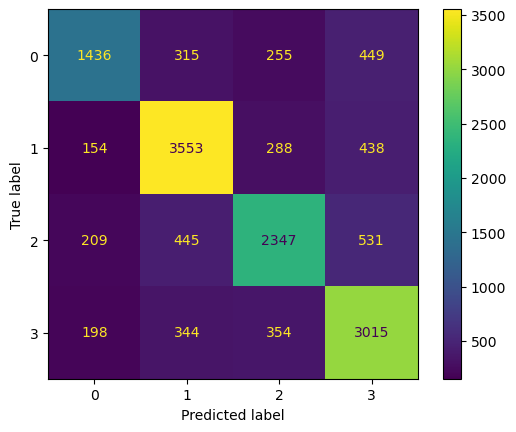

In [77]:
disp.plot()

plt.show()

In [78]:
coefficients = model.coef_



**Нейронная сеть**

In [79]:
import torch.nn as nn

In [80]:
import torch

Реализуем нейронную сеть с одним скрытым слоем, функцией активации relu и различными начальными инициализациями

In [81]:
class Net(nn.Module):
    def __init__(self,inp,init_type='xavier'):
        super(Net,self).__init__()

        self.fc1 = nn.Linear(inp, 100)
        self.act1 = nn.ReLU() 
        self.fc2 = nn.Linear(100, 4)

        if init_type=='xavier':
            torch.nn.init.xavier_normal_(self.fc1.weight) 
            torch.nn.init.xavier_normal_(self.fc2.weight)

        elif init_type=='he':
            torch.nn.init.kaiming_normal_(self.fc1.weight) 
            torch.nn.init.kaiming_normal_(self.fc2.weight) 
        elif  init_type=='zeros': 
            torch.nn.init.zeros_(self.fc1.weight) 
            torch.nn.init.zeros_(self.fc2.weight)
        else:    
            torch.nn.init.xavier_normal_(self.fc1.weight) 
            torch.nn.init.xavier_normal_(self.fc2.weight)
        
        #хуже всего nn.init.zeros_

    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        
        
        return x

In [82]:
def train(model, X, y, criterion, optimizer, num_epoch,X_test,y_test):

    ls=[]
    lstest=[]
    for t in range(num_epoch):
                
        y_pred = model(X)

        loss = criterion(y_pred, y)

        loss.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        
        if t%10==0:
            print(f'epoch: {t}, curr_loss:  {loss}')
            ls.append(loss)
            with torch.no_grad():
                lstest.append(criterion(model(X_test),y_test))
        lr_scheduler.step()
    return model,ls,lstest

In [83]:
netmodel = Net(tfidf_array.shape[1])


criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(netmodel.parameters(), lr=0.01)

In [84]:
y_train=torch.from_numpy(y_train)



In [85]:
y_test=torch.from_numpy(y_test)
X_test=torch.from_numpy(X_test)

In [86]:
X_train=torch.from_numpy(X_train)



In [87]:
y_train=y_train.long()
X_train=X_train.to(torch.float32)

In [88]:
y_test=y_test.long()
X_test=X_test.to(torch.float32)

In [89]:
y_train=y_train.to(torch.long)

In [90]:
import torch

**Нейронная сеть с инициализацией xavier_normal_ (Лучший вариант,  на равне с He)**

In [91]:
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=0.9)#потом можно изменить (в LROnPlateau в цикле при шаге нужно передавать  loss или метрику )
netmodel,ls,lts = train(netmodel, X_train, y_train, criterion, optimizer,100,X_test, y_test)

epoch: 0, curr_loss:  1.386229157447815
epoch: 10, curr_loss:  0.7769156098365784
epoch: 20, curr_loss:  0.522487223148346
epoch: 30, curr_loss:  0.42566564679145813
epoch: 40, curr_loss:  0.3647059202194214
epoch: 50, curr_loss:  0.32184913754463196
epoch: 60, curr_loss:  0.28406471014022827
epoch: 70, curr_loss:  0.2523360848426819
epoch: 80, curr_loss:  0.2228034883737564
epoch: 90, curr_loss:  0.1984945833683014


In [92]:
with torch.no_grad():
    nn_prediction = netmodel(X_test)

In [93]:
max_values, max_indices = torch.max(nn_prediction, dim=1)

In [94]:
print(f'Точность модели: {accuracy_score(max_indices, y_test):.2f}')

Точность модели: 0.82


In [95]:
print(f' f1 модели: {f1_score(max_indices, y_test,average="macro"):.2f}')

 f1 модели: 0.82


In [96]:
f1_score(max_indices, y_test,average="macro")

0.8168765254417197

In [97]:
lost_epoch=list(map(lambda x: x.detach().numpy(),ls))

In [98]:
yy=[(i+1)*10 for i in range(20)]

In [99]:
lost_epoch_test=list(map(lambda x: x.detach().numpy(),lts))

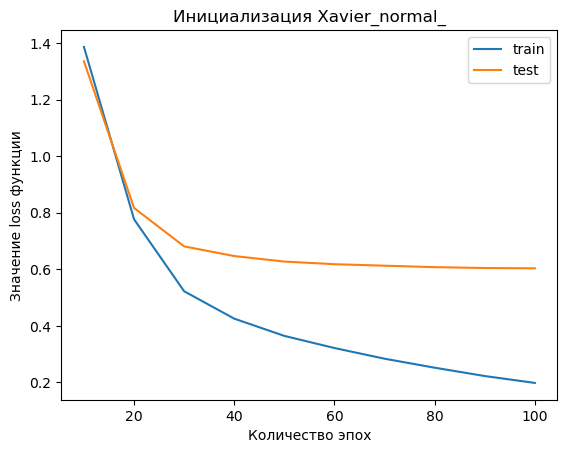

In [100]:
yy=[(i+1)*10 for i in range(10)]
plt.plot(yy,lost_epoch,label='train');
plt.plot(yy,lost_epoch_test,label='test');
plt.legend()
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('Инициализация Xavier_normal_');

**Нейронная сеть с инициализацией He**

In [101]:
netmodel = Net(tfidf_array.shape[1],init_type='he')


criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(netmodel.parameters(), lr=0.01)
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=0.9)#потом изменить (в LROnPlateau в цикле при шаге нужно передавать  loss или метрику )
netmodel,ls,lts = train(netmodel, X_train, y_train, criterion, optimizer,100,X_test, y_test)

epoch: 0, curr_loss:  1.3885728120803833
epoch: 10, curr_loss:  0.7654897570610046
epoch: 20, curr_loss:  0.5174999833106995
epoch: 30, curr_loss:  0.4224403500556946
epoch: 40, curr_loss:  0.3620963990688324
epoch: 50, curr_loss:  0.3193325400352478
epoch: 60, curr_loss:  0.28120648860931396
epoch: 70, curr_loss:  0.24901798367500305
epoch: 80, curr_loss:  0.21893207728862762
epoch: 90, curr_loss:  0.19419093430042267


In [102]:
with torch.no_grad():
    nn_prediction = netmodel(X_test)
    
max_values, max_indices = torch.max(nn_prediction, dim=1)
print(f'Точность модели: {accuracy_score(max_indices, y_test):.2f}')

Точность модели: 0.82


In [103]:
f1_score(max_indices, y_test,average="macro")

0.8177420605821298

In [104]:
lost_epoch=list(map(lambda x: x.detach().numpy(),ls))
lost_epoch_test=list(map(lambda x: x.detach().numpy(),lts))

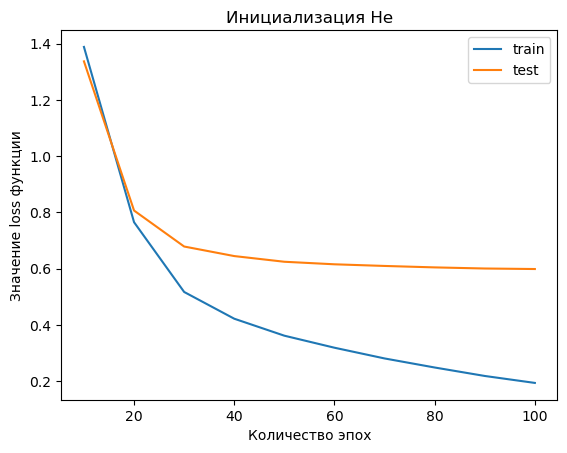

In [105]:
yy=[(i+1)*10 for i in range(10)]
plt.plot(yy,lost_epoch,label='train');
plt.plot(yy,lost_epoch_test,label='test');
plt.legend()
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('Инициализация He');

**Нейронная сеть с инициализацией нулями**

In [106]:
netmodel = Net(tfidf_array.shape[1],init_type='zeros')


criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(netmodel.parameters(), lr=0.01)
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=0.9)#потом изменить (в LROnPlateau в цикле при шаге нужно передавать  loss или метрику )
netmodel,ls,lts = train(netmodel, X_train, y_train, criterion, optimizer,100,X_test, y_test)

epoch: 0, curr_loss:  1.3861253261566162
epoch: 10, curr_loss:  1.247338891029358
epoch: 20, curr_loss:  1.14980947971344
epoch: 30, curr_loss:  1.0518518686294556
epoch: 40, curr_loss:  0.8998627662658691
epoch: 50, curr_loss:  0.8102349638938904
epoch: 60, curr_loss:  0.7547332644462585
epoch: 70, curr_loss:  0.7167949676513672
epoch: 80, curr_loss:  0.6841517686843872
epoch: 90, curr_loss:  0.656777560710907


In [107]:
with torch.no_grad():
    nn_prediction = netmodel(X_test)
    
max_values, max_indices = torch.max(nn_prediction, dim=1)
print(f'Точность модели: {accuracy_score(max_indices, y_test):.2f}')

Точность модели: 0.67


In [108]:
f1_score(max_indices, y_test,average="macro")

0.5512305460501277

In [109]:
lost_epoch=list(map(lambda x: x.detach().numpy(),ls))
lost_epoch_test=list(map(lambda x: x.detach().numpy(),lts))

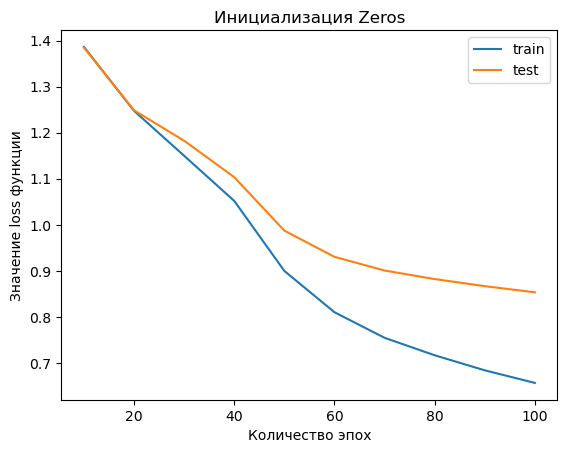

In [110]:
yy=[(i+1)*10 for i in range(10)]
plt.plot(yy,lost_epoch,label='train');
plt.plot(yy,lost_epoch_test,label='test');
plt.legend()
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('Инициализация Zeros');

**Нейронная сеть с инициализацией Xavier_uniform**

In [111]:
netmodel = Net(tfidf_array.shape[1],init_type='xavier_uniform')


criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(netmodel.parameters(), lr=0.01)
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=0.9)#потом изменить (в LROnPlateau в цикле при шаге нужно передавать  loss или метрику )
netmodel,ls,lts = train(netmodel, X_train, y_train, criterion, optimizer,100,X_test, y_test)

epoch: 0, curr_loss:  1.3908815383911133
epoch: 10, curr_loss:  0.7752112150192261
epoch: 20, curr_loss:  0.5230332016944885
epoch: 30, curr_loss:  0.42780882120132446
epoch: 40, curr_loss:  0.36848941445350647
epoch: 50, curr_loss:  0.32661497592926025
epoch: 60, curr_loss:  0.28914114832878113
epoch: 70, curr_loss:  0.2569029927253723
epoch: 80, curr_loss:  0.2261689454317093
epoch: 90, curr_loss:  0.20043788850307465


In [112]:
with torch.no_grad():
    nn_prediction = netmodel(X_test)
    
max_values, max_indices = torch.max(nn_prediction, dim=1)
print(f'Точность модели: {accuracy_score(max_indices, y_test):.2f}')

Точность модели: 0.82


In [113]:
f1_score(max_indices, y_test,average="macro")

0.8151291489536512

In [114]:
lost_epoch=list(map(lambda x: x.detach().numpy(),ls))
lost_epoch_test=list(map(lambda x: x.detach().numpy(),lts))

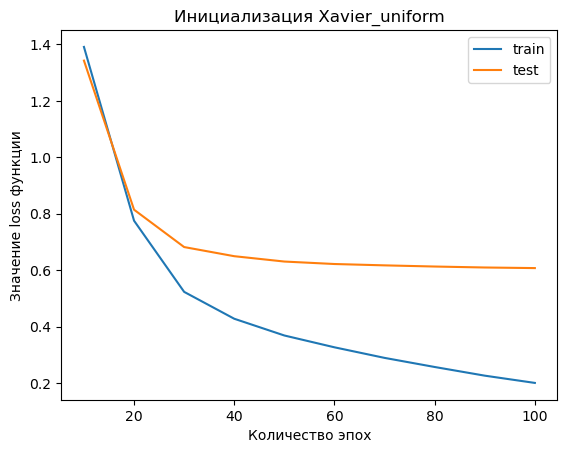

In [115]:
yy=[(i+1)*10 for i in range(10)]
plt.plot(yy,lost_epoch,label='train');
plt.plot(yy,lost_epoch_test,label='test');
plt.legend()
plt.ylabel('Значение loss функции');
plt.xlabel('Количество эпох');
plt.title('Инициализация Xavier_uniform');

В рамках данной работы была произведена классификация твитов с использованием логистической регресии (с L1 и L2 регуляризацией).
Предвариетльно текст был нормализован, были удалены наиболее редко встречающиеся слова.
Результат по основным метрикам получился похожим, при этом преимуществами является интерпретируемость модели. Были выведены слова, 
соответствующие большим весам при L2, а также занулившимся весам для L1. Занулившиеся слова - это слова, которые в основном 
встречаются редко или являются какими-то наборами букв, не имеющими смысл. Слова, имеющие наибольший вес в основном соответствуют 
наиболее важным словам для данной категории. Также была произведена классификация без использования предварительной 
лемматизации, результат получился чуть лучше по основным метрикам, при этом вектора имеют большую размерность и 
требуется больше ресурсов и времени на обработку. Таким образом, опимальным является вариант с использованием лемматизации.

Нейросетевой подход: для задачи многоклассовой классификации была создана нейронная сеть, протестированы различные варианты 
    начальной инициализации весов. Лучший вариант имеет сеть с инициализацией xavier_normal. Значения основных метрик получились 
    лучше, по сравнению с логистической регрессией